In [61]:
import matplotlib.pyplot as plt
import math
import pandas as pd
from numpy.fft import fft
import numpy as np
from sklearn.linear_model import LinearRegression

In [62]:
data = pd.read_csv('Assignment2.data')
data = data.to_numpy()
data = np.array([[float(num) for num in data[i][0].split('\t')] for i in range(len(data))])
y1 , y2 = data[:,0] , data[:,1] 
x = np.array(range(len(y2)))
n = len(y2)
N = 5

In [63]:
def lin_regression_using_matix(X,y):
    return np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.matmul(np.transpose(X),y))

0.11899412514961834


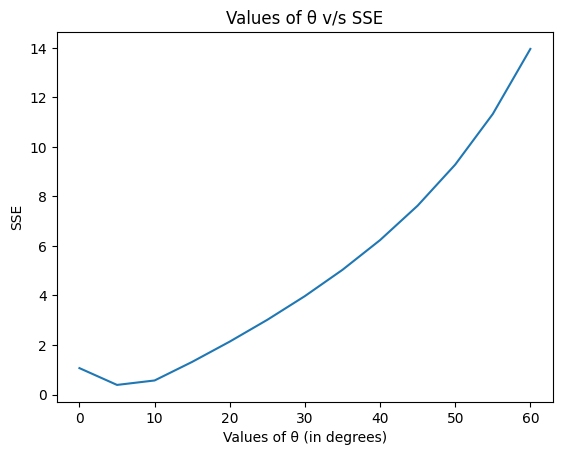

0.08748866352592401
[0.11899413]
0.3868646968463625


In [99]:
# Task 1
w_OLS = np.matmul(np.transpose(x),y2)/np.matmul(np.transpose(x),x)
# wOLS = np.matmul(np.linalg.inv(np.matmul(np.transpose(x),x)),np.matmul(np.transpose(x),y2))
print(w_OLS)
sse = math.inf
sse_list = []
for i in np.arange(0,65,5):
    y = x*math.tan(i*math.pi/180)
    sse_i = np.linalg.norm(y2-y,2)/len(y)
    sse_list.append(sse_i)
    if sse > sse_i:
        w_Lin_Srch = math.tan(i*math.pi/180)
        sse = sse_i
plt.plot(np.arange(0,65,5),sse_list)
plt.xlabel('Values of θ (in degrees)')
plt.ylabel('SSE')
plt.title('Values of θ v/s SSE')
plt.show()
print(w_Lin_Srch)
model = LinearRegression(fit_intercept=False)
x = x.reshape(-1,1)
# print(x)
reg = model.fit(x, y2)
print(reg.coef_)
print(sse)

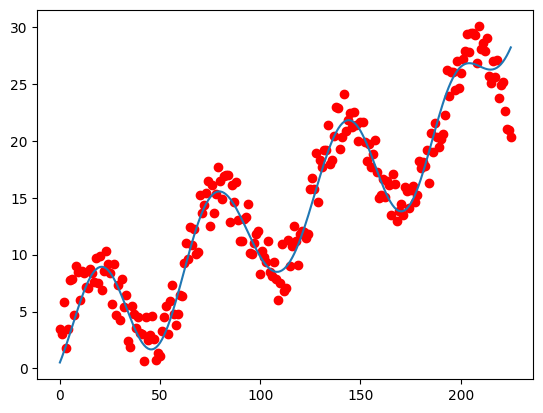

0.12217268660138307


In [69]:
N = 5 # number of frequencies to be taken
x = np.arange(0,len(y2),1)
y2_freq = np.fft.fft(y2)
freq_in_sorted = np.argsort(abs(y2_freq[:int(len(y2)/2)+len(y2)%2]))
freq_in_sorted = np.flip(freq_in_sorted)/len(y2)
freq_in_model = freq_in_sorted[1:N+1]
X = np.zeros((len(y2),2*N+1))
for i in range(N):
    X[:,2*i] = np.sin(2*math.pi*freq_in_model[i]*x)
    X[:,2*i+1] = np.cos(2*math.pi*freq_in_model[i]*x)
X[:,2*N] = x
w = lin_regression_using_matix(X,y2)
# reg = LinearRegression().fit(X, y2)
plt.plot(x,np.matmul(X,w))
plt.scatter(x,y2, color = 'r')
plt.show()
sse_eval = np.linalg.norm(y2-np.matmul(X,w),2)/len(y2)
print(sse_eval)

Interpolation

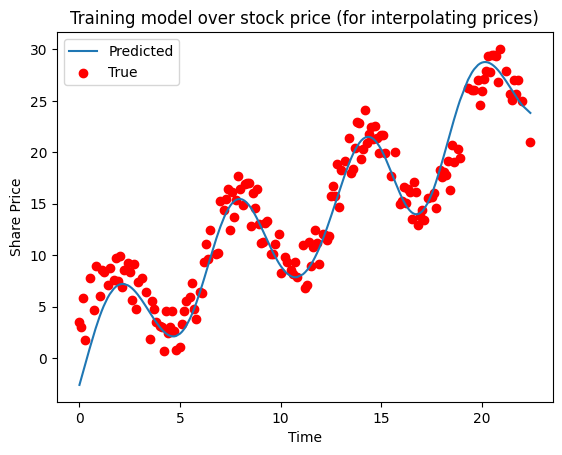

0.15369428882707703


In [89]:
rnd = np.arange(n)
np.random.shuffle(rnd)
train_sample = rnd[:int(.8*n)]
train_sample = np.sort(train_sample)
y2_train_sample = y2[train_sample]
y2_freq = np.fft.fft(y2_train_sample)
freq_in_sorted = np.argsort(abs(y2_freq[:int(len(y2_train_sample)/2)+len(y2_train_sample)%2]))
freq_in_sorted = np.flip(freq_in_sorted)/len(y2_train_sample)
freq_in_model = freq_in_sorted[1:N+1]
X = np.zeros((len(y2_train_sample),2*N+1))
for i in range(N):
    X[:,2*i] = np.sin(2*math.pi*freq_in_model[i]*train_sample)
    X[:,2*i+1] = np.cos(2*math.pi*freq_in_model[i]*train_sample)
X[:,2*N] = train_sample
w = lin_regression_using_matix(X,y2_train_sample)
plt.plot(train_sample/10,np.matmul(X,w))
plt.scatter(train_sample/10,y2_train_sample, color = 'r')
plt.title('Training model over stock price (for interpolating prices)')
plt.xlabel('Time')
plt.ylabel('Share Price')
plt.legend(['Predicted','True'])
plt.show()
sse_eval = np.linalg.norm(y2_train_sample-np.matmul(X,w),2)/len(y2_train_sample)
print(sse_eval)

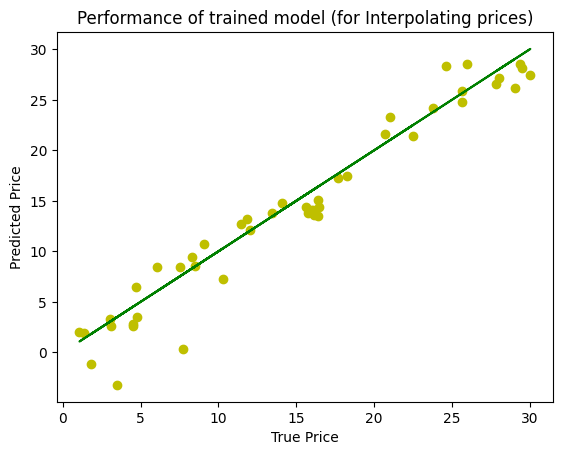

0.32853536300857067


In [79]:
eval_sample = rnd[int(.8*n):int(1*n)]
eval_sample = np.sort(eval_sample)
y2_eval_sample = y2[eval_sample]

X = np.zeros((len(y2_eval_sample),2*N+1))
for i in range(N):
    X[:,2*i] = np.sin(2*math.pi*freq_in_model[i]*eval_sample)
    X[:,2*i+1] = np.cos(2*math.pi*freq_in_model[i]*eval_sample)
X[:,2*N] = eval_sample
# w = lin_regression_using_matix(X,y2_eval_sample)
# sse_eval = np.linalg.norm(y2_eval_sample-X*w,2)
# print(sse_eval)
plt.scatter(y2_eval_sample,np.matmul(X,w),color='y')
plt.plot(y2_eval_sample,y2_eval_sample,color = 'g')
plt.title('Performance of trained model (for interpolating prices)')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.show()
sse_eval = np.linalg.norm(y2_eval_sample-np.matmul(X,w),2)/len(y2_eval_sample)
print(sse_eval)

Extrapolation

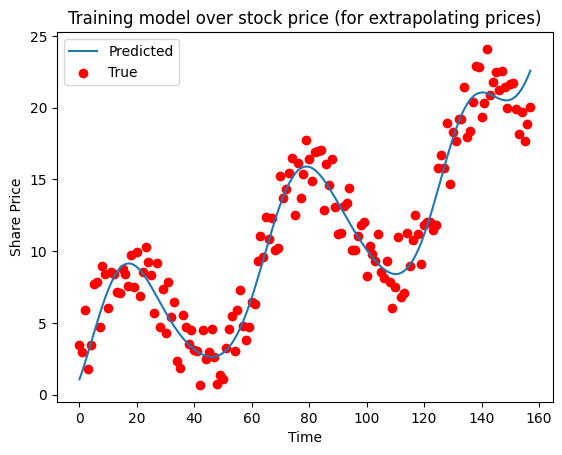

0.12806766495788105


In [88]:
N=5
rnd = np.arange(n)
train_sample = rnd[:int(.7*n)]
train_sample = np.sort(train_sample)
y2_train_sample = y2[train_sample]
y2_freq = np.fft.fft(y2_train_sample)
freq_in_sorted = np.argsort(abs(y2_freq[:int(len(y2_train_sample)/2)+len(y2_train_sample)%2]))
freq_in_sorted = np.flip(freq_in_sorted)/len(y2_train_sample)
freq_in_model = freq_in_sorted[1:N+1]
X = np.zeros((len(y2_train_sample),2*N+1))
for i in range(N):
    X[:,2*i] = np.sin(2*math.pi*freq_in_model[i]*train_sample)
    X[:,2*i+1] = np.cos(2*math.pi*freq_in_model[i]*train_sample)
X[:,2*N] = train_sample
w = lin_regression_using_matix(X,y2_train_sample)
plt.plot(train_sample,np.matmul(X,w))
plt.scatter(train_sample,y2_train_sample, color = 'r')
plt.title('Training model over stock price (for extrapolating prices)')
plt.xlabel('Time')
plt.ylabel('Share Price')
plt.legend(['Predicted','True'])
plt.show()
sse_eval = np.linalg.norm(y2_train_sample-np.matmul(X,w),2)/len(y2_train_sample)
print(sse_eval)


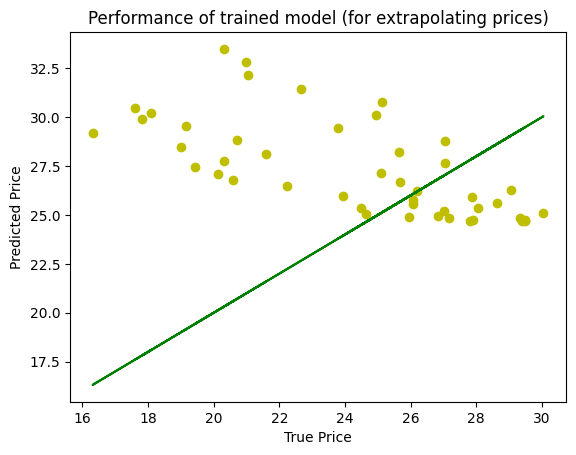

0.9616378143767419


In [86]:
eval_sample = rnd[int(.8*n):int(1*n)]
eval_sample = np.sort(eval_sample)
y2_eval_sample = y2[eval_sample]
X = np.zeros((len(y2_eval_sample),2*N+1))
for i in range(N):
    X[:,2*i] = np.sin(2*math.pi*freq_in_model[i]*eval_sample)
    X[:,2*i+1] = np.cos(2*math.pi*freq_in_model[i]*eval_sample)
X[:,2*N] = eval_sample
# w = lin_regression_using_matix(X,y2_eval_sample)
# sse_eval = np.linalg.norm(y2_eval_sample-X*w,2)
# print(sse_eval)
plt.plot(y2_eval_sample,y2_eval_sample,color = 'g')
plt.scatter(y2_eval_sample,np.matmul(X,w), color = 'y')
plt.title('Performance of trained model (for extrapolating prices)')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.show()
sse_eval = np.linalg.norm(y2_eval_sample-np.matmul(X,w),2)/len(y2_eval_sample)
print(sse_eval)

Task 3

Extrapolation

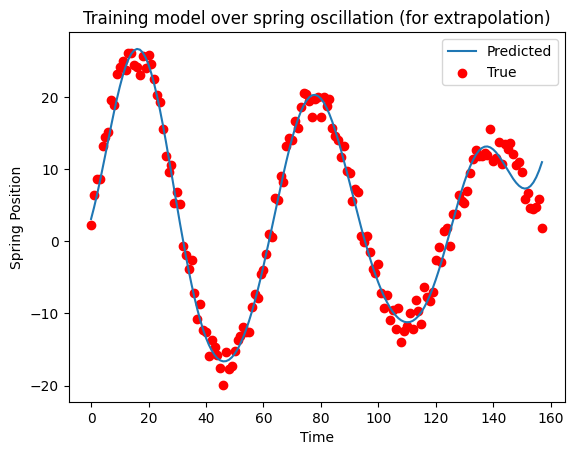

0.15300049357670267


In [93]:
N=5
rnd = np.arange(n)
train_sample = rnd[:int(.7*n)]
train_sample = np.sort(train_sample)
y1_train_sample = y1[train_sample]
y1_freq = np.fft.fft(y1_train_sample)
# plt.plot(abs(y1_freq))
freq_in_sorted = np.argsort(abs(y1_freq[1:int(len(y1_train_sample)/2)+len(y1_train_sample)%2]))
freq_in_sorted = np.flip(freq_in_sorted+1)/len(y1_train_sample)
freq_in_model = freq_in_sorted[0:N]
X = np.zeros((len(y1_train_sample),2*N+1))
for i in range(N):
    X[:,2*i] = np.sin(2*math.pi*freq_in_model[i]*train_sample)
    X[:,2*i+1] = np.cos(2*math.pi*freq_in_model[i]*train_sample)
X[:,2*N] = train_sample
w = lin_regression_using_matix(X,y1_train_sample)
plt.plot(train_sample,np.matmul(X,w))
plt.scatter(train_sample,y1_train_sample, color = 'r')
plt.title('Training model over spring oscillation (for extrapolation)')
plt.xlabel('Time')
plt.ylabel('Spring Position')
plt.legend(['Predicted','True'])
plt.show()
sse_eval = np.linalg.norm(y1_train_sample-np.matmul(X,w),2)/len(y1_train_sample)
print(sse_eval)

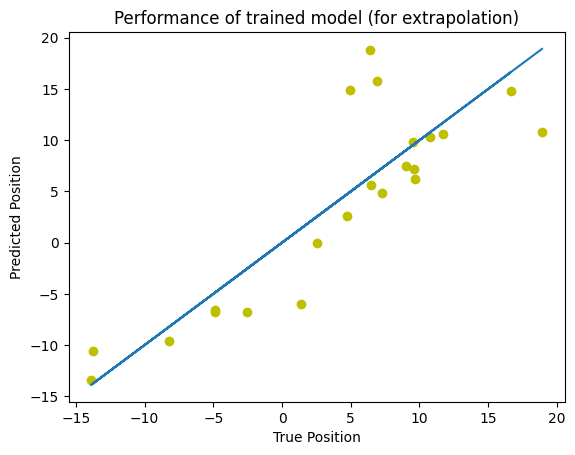

1.0468370966374907


In [96]:
eval_sample = rnd[int(.7*n):int(.8*n)]
eval_sample = np.sort(eval_sample)
y1_eval_sample = y1[eval_sample]
X = np.zeros((len(y1_eval_sample),2*N+1))
for i in range(N):
    X[:,2*i] = np.sin(2*math.pi*freq_in_model[i]*eval_sample)
    X[:,2*i+1] = np.cos(2*math.pi*freq_in_model[i]*eval_sample)
X[:,2*N] = eval_sample
# w = lin_regression_using_matix(X,y2_eval_sample)
# sse_eval = np.linalg.norm(y2_eval_sample-X*w,2)
# print(sse_eval)
plt.plot(y1_eval_sample,y1_eval_sample)
plt.scatter(y1_eval_sample,np.matmul(X,w),color = 'y')
plt.title('Performance of trained model (for extrapolation)')
plt.xlabel('True Position')
plt.ylabel('Predicted Position')
plt.show()
sse_eval = np.linalg.norm(y1_eval_sample-np.matmul(X,w),2)/len(y1_eval_sample)
print(sse_eval)

Interpolation

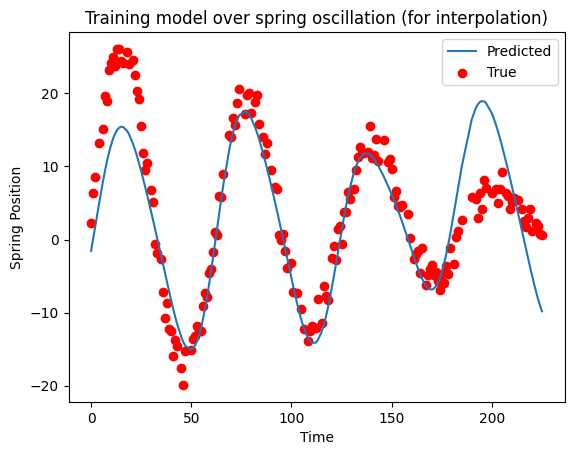

0.39251822734790615


In [94]:
N=5
rnd = np.arange(n)
np.random.shuffle(rnd)
train_sample = rnd[:int(.8*n)]
train_sample = np.sort(train_sample)
y1_train_sample = y1[train_sample]
y1_freq = np.fft.fft(y1_train_sample)
# plt.plot(abs(y1_freq))
freq_in_sorted = np.argsort(abs(y1_freq[1:int(len(y1_train_sample)/2)+len(y1_train_sample)%2]))
freq_in_sorted = np.flip(freq_in_sorted+1)/len(y1_train_sample)
freq_in_model = freq_in_sorted[0:N]
X = np.zeros((len(y1_train_sample),2*N+1))
for i in range(N):
    X[:,2*i] = np.sin(2*math.pi*freq_in_model[i]*train_sample)
    X[:,2*i+1] = np.cos(2*math.pi*freq_in_model[i]*train_sample)
X[:,2*N] = train_sample
w = lin_regression_using_matix(X,y1_train_sample)
plt.plot(train_sample,np.matmul(X,w))
plt.scatter(train_sample,y1_train_sample, color = 'r')
plt.title('Training model over spring oscillation (for interpolation)')
plt.xlabel('Time')
plt.ylabel('Spring Position')
plt.legend(['Predicted','True'])
plt.show()
sse_eval = np.linalg.norm(y1_train_sample-np.matmul(X,w),2)/len(y1_train_sample)
print(sse_eval)

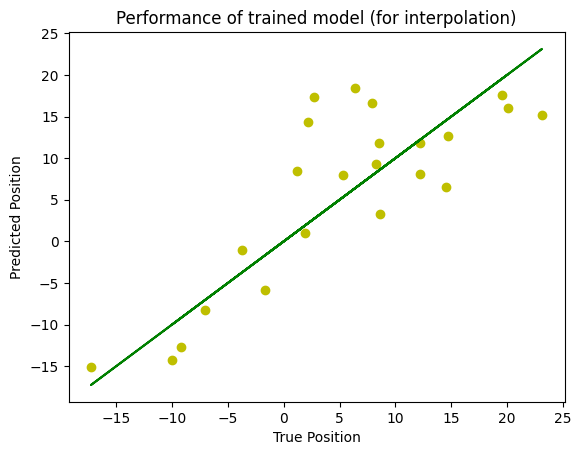

1.3106943978056234


In [98]:
eval_sample = rnd[int(.8*n):int(.9*n)]
eval_sample = np.sort(eval_sample)
y1_eval_sample = y1[eval_sample]
X = np.zeros((len(y1_eval_sample),2*N+1))
for i in range(N):
    X[:,2*i] = np.sin(2*math.pi*freq_in_model[i]*eval_sample)
    X[:,2*i+1] = np.cos(2*math.pi*freq_in_model[i]*eval_sample)
X[:,2*N] = eval_sample
# w = lin_regression_using_matix(X,y2_eval_sample)
# sse_eval = np.linalg.norm(y2_eval_sample-X*w,2)
# print(sse_eval)
plt.plot(y1_eval_sample,y1_eval_sample,color='g')
plt.scatter(y1_eval_sample,np.matmul(X,w), color = 'y')
plt.title('Performance of trained model (for interpolation)')
plt.xlabel('True Position')
plt.ylabel('Predicted Position')
plt.show()
sse_eval = np.linalg.norm(y1_eval_sample-np.matmul(X,w),2)/len(y1_eval_sample)
print(sse_eval)